In [1]:
import pandas as pd
import numpy as np
import unicodedata
from nltk.tokenize import sent_tokenize #tokenizes sentences
from nltk.tokenize import word_tokenize #tokenizes words
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split,  KFold
punctuation_ = set(string.punctuation)
stopwords_ = set(stopwords.words('english'))
import matplotlib.pyplot as plt
import scipy.stats as scs
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

In [2]:
acnh=pd.read_csv('../archive/animal_crossing_dataset.csv')
acnh.columns

Index(['subreddit', 'id', 'title', 'ups', 'downs', 'upvote_ratio',
       'total_awards_received', 'num_comments', 'created_utc', 'url',
       'filename'],
      dtype='object')

In [3]:
doom=pd.read_csv('../archive/doom_crossing_dataset.csv')
doom.columns

Index(['subreddit', 'id', 'title', 'ups', 'downs', 'upvote_ratio',
       'total_awards_received', 'num_comments', 'created_utc', 'url',
       'filename'],
      dtype='object')

In [4]:
index_a=pd.Index(acnh['id'])
acnh_sub=pd.DataFrame(acnh['subreddit']).set_index(index_a)
index_d=pd.Index(doom['id'])
doom_sub=pd.DataFrame(doom['subreddit']).set_index(index_d)

In [11]:
Xa=pd.DataFrame(acnh['title']).set_index(index_a)
Xd=pd.DataFrame(doom['title']).set_index(index_d)
X_titles=pd.concat([Xd, Xa])
y=pd.concat([doom_sub ,acnh_sub])
y=np.array(y).reshape(-1,)
for title in X_titles.iloc[:,0]:
    title.replace('villagers', 'villager')

In [6]:
tfidf = TfidfVectorizer(stop_words='english', smooth_idf=True)  # Checkout out the options!

document_tfidf_matrix = tfidf.fit_transform(X_titles.iloc[:,0])

X_tf_idf = pd.DataFrame(document_tfidf_matrix.todense(), columns = tfidf.vocabulary_)
X_tf_idf.set_index(X_titles.index, inplace=True)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_tf_idf, y, test_size=0.2)

In [19]:
model_R=RandomForestClassifier(10)
model_R.fit(X_train, y_train)
y_train_hat=model_R.predict(X_train)
y_hat=model_R.predict(X_test)
model_R.score(X_test, y_test)
#recall_score(y_test, y_hat)
#train_recall.append(recall_score(y_train, y_train_hat))

0.7

In [16]:
y_hat

array(['Doom', 'AnimalCrossing', 'Doom', 'AnimalCrossing',
       'AnimalCrossing', 'Doom', 'Doom', 'Doom', 'Doom', 'Doom', 'Doom',
       'AnimalCrossing', 'AnimalCrossing', 'Doom', 'AnimalCrossing',
       'AnimalCrossing', 'AnimalCrossing', 'Doom', 'Doom', 'Doom',
       'AnimalCrossing', 'Doom', 'AnimalCrossing', 'AnimalCrossing',
       'Doom', 'AnimalCrossing', 'Doom', 'AnimalCrossing', 'Doom',
       'AnimalCrossing', 'Doom', 'Doom', 'AnimalCrossing',
       'AnimalCrossing', 'AnimalCrossing', 'Doom', 'Doom', 'Doom', 'Doom',
       'Doom', 'Doom', 'Doom', 'Doom', 'AnimalCrossing', 'Doom',
       'AnimalCrossing', 'Doom', 'Doom', 'AnimalCrossing', 'Doom',
       'AnimalCrossing', 'Doom', 'AnimalCrossing', 'Doom',
       'AnimalCrossing', 'Doom', 'Doom', 'Doom', 'Doom', 'Doom',
       'AnimalCrossing', 'Doom', 'Doom', 'AnimalCrossing', 'Doom',
       'AnimalCrossing', 'Doom', 'Doom', 'AnimalCrossing', 'Doom', 'Doom',
       'AnimalCrossing', 'AnimalCrossing', 'Doom', 'AnimalCrossi

In [41]:
depths=[1, 5, 10, 25, 50, 75, 100]
test_depths=[]
train_depths=[]
oob_score=[]
for depth in depths:
    model_R=RandomForestClassifier(75, max_depth=depth, oob_score=True)#solver lbfgs, L2 cost function
    model_R.fit(X_train, y_train)
    test_depths.append(model_R.score(X_test, y_test))
    train_depths.append(model_R.score(X_train, y_train))
    oob_score.append(model_R.oob_score_)

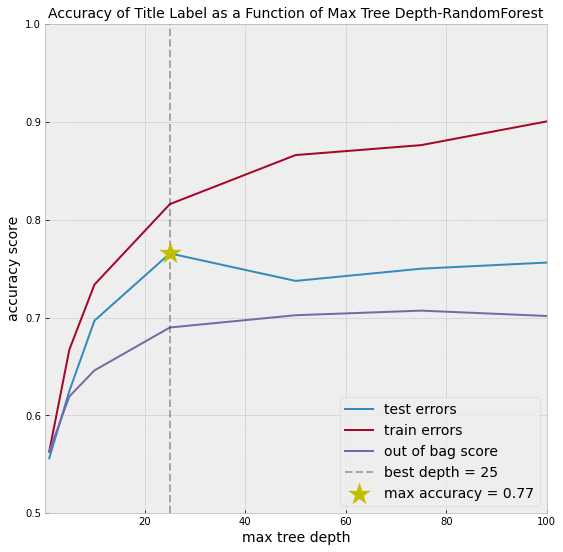

In [45]:
fig, ax=plt.subplots(figsize=(9,9))
plt.style.use('bmh')
ax.plot(depths, test_depths, label = 'test errors')
ax.plot(depths, train_depths, label = 'train errors')
ax.plot(depths, oob_score, label = 'out of bag score')
ax.set_xlabel('max tree depth', fontsize=14)
ax.set_ylabel('accuracy score', fontsize=14)
ax.set_title('Accuracy of Title Label as a Function of Max Tree Depth-RandomForest', fontsize=14)
ax.set_xlim(0.1, 100)
ax.set_ylim(0.5, 1)
ax.scatter(n[test_depths.index(max(test_depths))], max(test_depths), label = f'max accuracy = {max(test_depths):.2f}', s= 500, color = 'y', marker = '*', zorder=4)
plt.axvline(n[test_depths.index(max(test_depths))], label = f'best depth = {n[test_depths.index(max(test_depths))]}', color = 'k', linestyle = 'dashed', alpha=0.3)

plt.legend(loc = 4, fontsize=14);
plt.savefig('bagging/Title_depth_rand_for', bbox_inches='tight')

In [46]:
n=[1, 5, 10, 25, 50, 75, 100, 200, 500]
test_acc=[]
train_acc=[]
oob_score_n=[]
for est in n:
    model_R=RandomForestClassifier(est, max_depth=25, oob_score=True)#solver lbfgs, L2 cost function
    model_R.fit(X_train, y_train)
    y_train_hat=model_R.predict(X_train)
    y_hat=model_R.predict(X_test)
    test_acc.append(model_R.score(X_test, y_test))
    train_acc.append(model_R.score(X_train, y_train))
    oob_score_n.append(model_R.oob_score_)

/Users/johnwilliams/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/johnwilliams/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/johnwilliams/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/johnwilliams/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/johnwilliams/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.p

In [ ]:
0.7133907595927956

In [22]:
test_recall

[0.68125, 0.725, 0.73125, 0.725, 0.715625, 0.725, 0.71875, 0.71875]

In [23]:
n[test_recall.index(max(test_recall))]

50

In [27]:
max_test=max(test_recall)
max_train=max(train_recall)

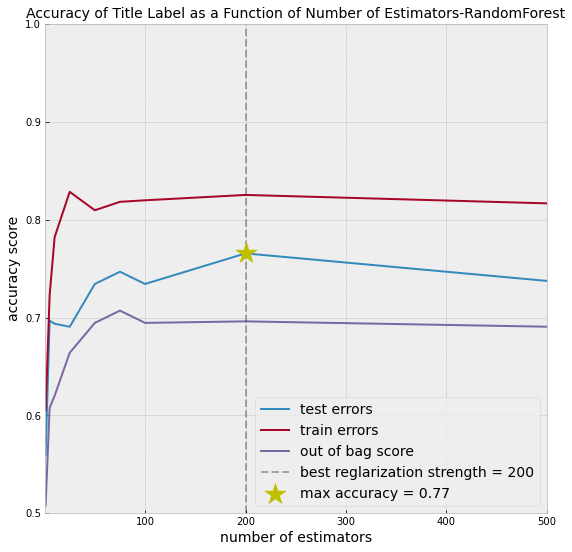

In [51]:
fig, ax=plt.subplots(figsize=(9,9))
plt.style.use('bmh')
ax.plot(n, test_acc, label = 'test errors')
ax.plot(n, train_acc, label = 'train errors')
ax.plot(n, oob_score_n, label = 'out of bag score')
ax.set_xlabel('number of estimators', fontsize=14)
ax.set_ylabel('accuracy score', fontsize=14)
ax.set_title('Accuracy of Title Label as a Function of Number of Estimators-RandomForest', fontsize=14)
ax.set_xlim(0.1, 500)
ax.set_ylim(0.5, 1)
ax.scatter(n[test_acc.index(max(test_acc))], max(test_acc), label = f'max accuracy = {max(test_acc):.2f}', s= 500, color = 'y', marker = '*', zorder=4)
plt.axvline(n[test_acc.index(max(test_acc))], label = f'best reglarization strength = {n[test_acc.index(max(test_acc))]}', color = 'k', linestyle = 'dashed', alpha=0.3)

plt.legend(loc = 4, fontsize=14);
#plt.savefig('bagging/Title_est_rf', bbox_inches='tight')

In [ ]:
n=[1, 5, 10, 25, 50, 75, 100, 200]
test_recall=[]
train_recall=[]
for est in n:
    model_R=RandomForestClassifier(est, max_depth=)#solver lbfgs, L2 cost function
    model_R.fit(X_train, y_train)
    y_train_hat=model_R.predict(X_train)
    y_hat=model_R.predict(X_test)
    test_recall.append(model_R.score(X_test, y_test))
    train_recall.append(model_R.score(X_train, y_train))

In [61]:
def calculate_threshold_values(prob, y):
    '''
    Build dataframe of the various confusion-matrix ratios by threshold
    from a list of predicted probabilities and actual y values
    '''
    y=pd.get_dummies(y)
    y=1-y.iloc[:,0]
    df = pd.DataFrame({'prob': prob, 'y': y})
    df.sort_values('prob', inplace=True)
    
    actual_p = df.y.sum()
    actual_n = df.shape[0] - df.y.sum()

    df['tn'] = (df.y == 0).cumsum()
    df['fn'] = df.y.cumsum()
    df['fp'] = actual_n - df.tn
    df['tp'] = actual_p - df.fn

    df['fpr'] = df.fp/(df.fp + df.tn)
    df['tpr'] = df.tp/(df.tp + df.fn)
    df['precision'] = df.tp/(df.tp + df.fp)
    df['F1'] = 2*((df.tp/(df.tp + df.fp)) * (df.tp/(df.tp + df.fn)))/((df.tp/(df.tp + df.fp)) + (df.tp/(df.tp + df.fn)))
    df = df.reset_index(drop=True)
    return df

def plot_roc(ax, df, val):
    ax.plot([1]+list(df.fpr), [1]+list(df.tpr), label="ROC"+f'{est} Estimators')
    #ax.plot([0,1],[0,1], 'k', label="random")
    ax.set_xlabel('fpr', fontsize=14)
    ax.set_ylabel('tpr', fontsize=14)
    #ax.set_title('ROC Curve')
    ax.legend()

In [60]:
model_R.predict_proba(X_test)

array([[0.4660865 , 0.5339135 ],
       [0.51949265, 0.48050735],
       [0.42645294, 0.57354706],
       [0.47708636, 0.52291364],
       [0.52118972, 0.47881028],
       [0.48179586, 0.51820414],
       [0.47177898, 0.52822102],
       [0.42945643, 0.57054357],
       [0.45357697, 0.54642303],
       [0.47229432, 0.52770568],
       [0.37156917, 0.62843083],
       [0.50021743, 0.49978257],
       [0.69625732, 0.30374268],
       [0.46685133, 0.53314867],
       [0.5949602 , 0.4050398 ],
       [0.50518795, 0.49481205],
       [0.52189021, 0.47810979],
       [0.36354526, 0.63645474],
       [0.47230772, 0.52769228],
       [0.27945962, 0.72054038],
       [0.52038283, 0.47961717],
       [0.53309379, 0.46690621],
       [0.39501151, 0.60498849],
       [0.47349206, 0.52650794],
       [0.50886333, 0.49113667],
       [0.61117971, 0.38882029],
       [0.4564439 , 0.5435561 ],
       [0.5513622 , 0.4486378 ],
       [0.4791175 , 0.5208825 ],
       [0.6563392 , 0.3436608 ],
       [0.

/Users/johnwilliams/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/johnwilliams/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/johnwilliams/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/johnwilliams/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/johnwilliams/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.p

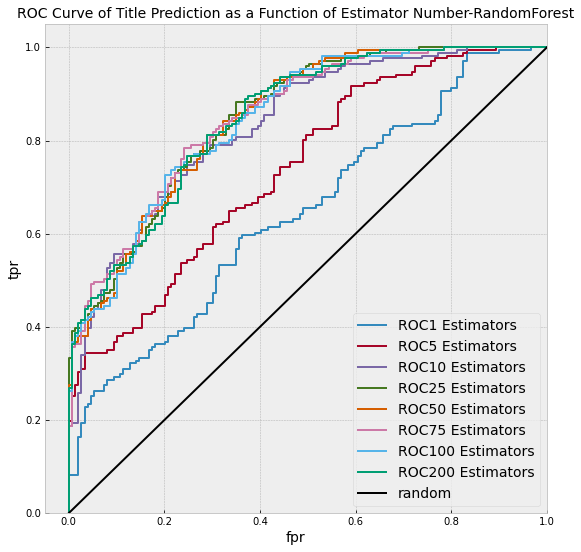

In [62]:
fig, (ax0) = plt.subplots(figsize=(9,9))
plt.style.use('bmh')
n=[1, 5, 10, 25, 50, 75, 100, 200]
for est in n:
    model_R=RandomForestClassifier(est, max_depth=25, oob_score=True)#solver lbfgs, L2 cost function
    model_R.fit(X_train, y_train)
    df = calculate_threshold_values(model_R.predict_proba(X_test)[:,1], y_test)
    plot_roc(ax0, df, est)
ax0.set_xlim(-0.05, 1)
ax0.set_ylim(0, 1.05)
ax0.plot([0,1],[0,1], 'k', label="random")
ax0.legend(fontsize=14)
ax0.set_title('ROC Curve of Title Prediction as a Function of Estimator Number-RandomForest', fontsize=14);
plt.savefig('bagging/Title_ROC_rf', bbox_inches='tight')